<a href="https://colab.research.google.com/github/DAN-MASH/Machine_learning_models/blob/main/fruitclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import cv2
import PIL
from PIL import Image
import os
import glob
from glob import glob
import numpy as np
import cv2
import matplotlib.pylab as plt

import imutils
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.preprocessing.image as image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_path = glob('/content/drive/MyDrive/Colab Notebooks/fruitclass/Riped and Unriped Tomato Dataset/Images/*.jpeg')
label_path = glob('/content/drive/MyDrive/Colab Notebooks/fruitclass/Riped and Unriped Tomato Dataset/labels/*.txt')

In [ ]:
image_path[5]

'/content/drive/MyDrive/Colab Notebooks/fruitclass/Riped and Unriped Tomato Dataset/Images/riped_tomato_28.jpeg'

In [ ]:
label_path[6]

'/content/drive/MyDrive/Colab Notebooks/fruitclass/Riped and Unriped Tomato Dataset/labels/unriped_tomato_17.txt'

In [ ]:
img_mpl =plt.imread(image_path[5])
img_cv2 = cv2.imread(image_path[5])
img_mpl.shape, img_cv2.shape

((481, 860, 4), (481, 860, 3))

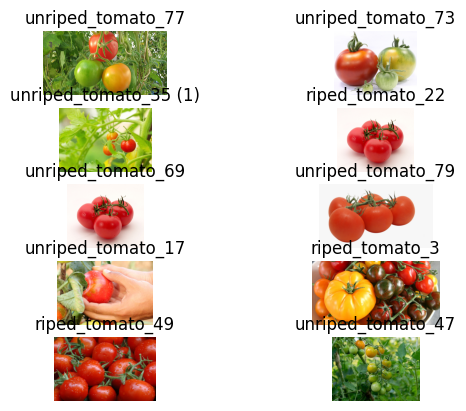

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2)

for i in range(len(image_path)):
  img_mpl = plt.imread(image_path[i])
  img_cv2 = cv2.imread(image_path[i])
  #convert the cv2 image color order form BGR TO RGB
  img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
  #print(img_mpl.shape, img_cv2.shape)
  #cv2.imshow('image', img_cv2)
  #plt.imshow(img_mpl)
  #axs[i].imshow(img_cv2_rgb)
   # Use enumerate and flatten the axs array to correctly access individual axes
  for j, ax in enumerate(axs.flatten()):
    if j == i:
      ax.imshow(img_cv2_rgb)
      ax.axis('off')
      # Extract label from labels_path (assuming labels are in the filenames)
      label = label_path[i].split('/')[-1].split('.')[0]
      ax.set_title(label)
      break  # Exit the inner loop once the image is displayed
  #axs[i].axis('off')
  #include the image label in the images



plt.show()


In [ ]:
ripe_images = []
unripe_images = []

# Assuming image_path is a directory containing images
for image_paths in image_path:
    # Check if it's a file or directory
    if os.path.isfile(image_paths):
        # If it's a file, directly process it
        if image_paths.endswith('.jpeg'):
            if 'unriped_tomato' in image_paths:
                unripe_images.append(image_paths)
            else:
                ripe_images.append(image_paths)
    else:
        # If it's a directory, list its contents
        for file_name in os.listdir(image_paths):
            file_path = os.path.join(image_paths, file_name)
            if file_name.endswith('.jpeg'):
                if 'unriped_tomato' in file_name:
                    unripe_images.append(file_path)
                else:
                    ripe_images.append(file_path)

In [ ]:
print(len(ripe_images))
print(len(unripe_images))

117
91


In [ ]:
# Combine riped and unriped images into a single dataset with labels
data = []
labels = []

# Function to load and preprocess images
def load_and_preprocess_image(image_path, img_size=(150, 150)):
    img = cv2.imread(image_path)  # Read the image
    img = cv2.resize(img, img_size)  # Resize the image
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

# Preprocess riped tomatoes and assign label 1
for img_path in ripe_images:
    img = load_and_preprocess_image(img_path)
    data.append(img)
    labels.append(1)  # Label 1 for riped

# Preprocess unriped tomatoes and assign label 0
for img_path in unripe_images:
    img = load_and_preprocess_image(img_path)
    data.append(img)
    labels.append(0)  # Label 0 for unriped

# Convert lists to numpy arrays for input to the model
data = np.array(data)
labels = np.array(labels)

In [ ]:
data.shape

(208, 150, 150, 3)

In [ ]:
#import the neccessary tensorflow and sci-kit learn libraries
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = np.reshape(data, (data.shape[0], -1))
y = np.reshape(labels, (labels.shape[0], -1)) # Reshape data to 2D # Reshape data to 2D

In [ ]:
#split the data
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=labels)

In [ ]:
X_train.shape

(166, 67500)

In [ ]:
def model(model,X,y):
  #split the data
  X = np.reshape(data, (data.shape[0], -1))
  y = np.reshape(labels, (labels.shape[0], -1)) # Reshape data to 2D # Reshape data to 2D
  X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=labels)
  trained_model = model.fit(X_train,y_train)
  y_pred = trained_model.predict(X_test)
  y_pred = np.round(y_pred,4).astype(int)
  print(classification_report(y_pred, y_test))
  print(accuracy_score(y_pred, y_test))
  return trained_model

In [ ]:
from sklearn.svm import SVC
svm = SVC()
model = model(svm,X,y)
# model = model(svm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.92      0.92      0.92        24

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42

0.9047619047619048


In [ ]:
from ssl import SSLCertVerificationError
#use GridsearchCV
classifier = SVC()
parameter_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(estimator=classifier, param_grid=parameter_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parametets: {best_params}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_pred, y_test))
print(f"accuracy score: {accuracy_score(y_pred, y_test)}")




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Parametets: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.92      0.96        26

    accuracy                           0.95        42
   macro avg       0.94      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42

accuracy score: 0.9523809523809523


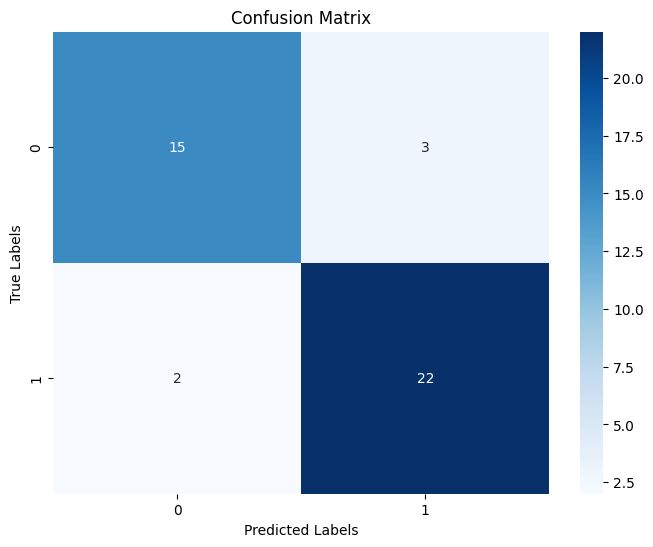

In [ ]:
 # Plot confusion matrix using seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

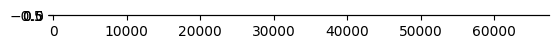

In [ ]:
#visualize one of the predicted image
import random
img_pred = random.choice(X_test)
img_pred = np.reshape(img_pred, (1, -1))
#img_pred.shape
plt.imshow(img_pred)
plt.show()



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Combine datase
data = np.concatenate((ripe_images, unripe_images, axis=0))
labels = np.concatenate((np.ones(len(ripe_images)), np.zeros(len(unripe_images),axis=0))

NameError: name 'ripe_labels' is not defined

In [ ]:
# X = np.reshape(data, (data.shape[0], -1))
# y = np.reshape(labels, (labels.shape[0], -1)) # Reshape data to 2D # Reshape data to 2D

In [ ]:
X2 = np.array(data)
y2 = np.array(labels)

In [ ]:
X.shape

(208, 67500)

In [ ]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=1000).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

In [ ]:
# Reshape the image data to (150, 150, 3)
X_train = X_train.reshape(-1, 150, 150, 3)
X_val = X_val.reshape(-1, 150, 150, 3)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=1000).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

# ... rest of your code ...

In [ ]:
X_train.shape

(166, 150, 150, 3)

In [ ]:
#Create a CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
cnn=tf.keras.models.Sequential()
#convolutional layer
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3))),
cnn.add(MaxPooling2D(2,2)),
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D(2,2))
#flatten
cnn.add(Flatten())
#dense layer
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
#compiler
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Ensure the model is correctly built before fitting
cnn.build((None, 150, 150, 3)) # Add this line

In [ ]:
history = cnn.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6069 - loss: 2.6786 - val_accuracy: 0.9762 - val_loss: 0.5027
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7087 - loss: 0.5518 - val_accuracy: 0.7381 - val_loss: 0.4227
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8701 - loss: 0.3451 - val_accuracy: 0.9286 - val_loss: 0.1973
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9281 - loss: 0.1701 - val_accuracy: 0.9524 - val_loss: 0.1875
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9333 - loss: 0.2000 - val_accuracy: 0.9286 - val_loss: 0.1425
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9839 - loss: 0.0550 - val_accuracy: 0.9524 - val_loss: 0.0906
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9497 - loss: 0.0804 - val_accuracy: 0.9762 - val_loss: 0.0682
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9791 - loss: 0.0687 - val_accuracy: 1.0000 - val_loss: 0.0357
Epoch 9/10
6/

In [ ]:
val_loss, val_accuracy = cnn.evaluate(val_dataset,return_dict=True).values()
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')
cnn.evaluate(val_dataset,return_dict=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 1.0000 - loss: 0.0260
Validation Loss: 1.0
Validation Accuracy: 0.024057462811470032
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 1.0000 - loss: 0.0260


{'accuracy': 1.0, 'loss': 0.024057462811470032}

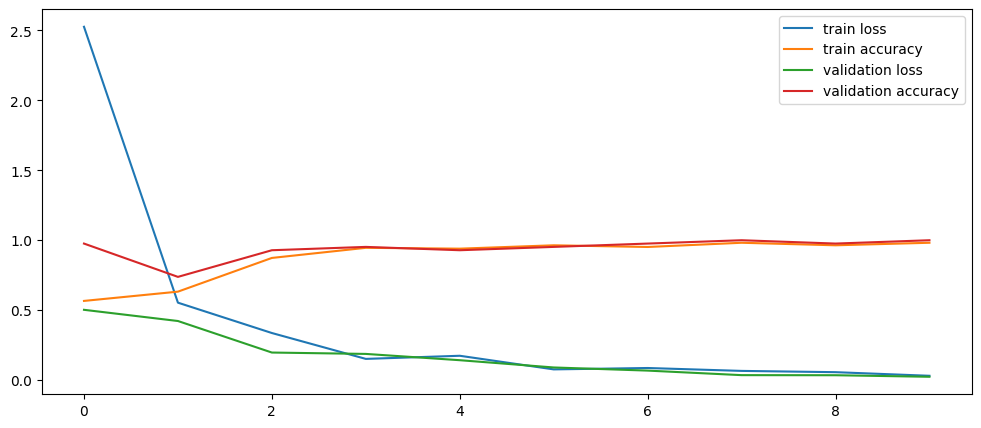

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [ ]:
import cv2
def show_image_and_predict_from_array(model, val_image_index):
    image_array = X_val[val_image_index]
    # Ensure the image is in the correct shape and normalized
    if image_array.ndim == 3:
        image_array = np.expand_dims(image_array, axis=0)
    if image_array.max() > 1.0:
        image_array = image_array*255.0

    # Predict the label
    prediction = model.predict(image_array)
    label = 'Ripe' if prediction[0] > 0.5 else 'Unripe'
    target_label = 'Ripe' if y_val[val_image_index] > 0.5 else 'Unripe'

    # Display the image and print the prediction
    #from google.colab.patches import cv2_imshow
    # cv2.imshow('image', image_array[0])
    # cv2.cvtColor(image_array[0], cv2.COLOR_RGB2BGR)
    image_array_rgb = cv2.cvtColor(image_array[0], cv2.COLOR_BGR2RGB)
    plt.imshow(image_array_rgb)
    plt.title(f'Predicted: {label}')
    plt.axis('off')
    plt.show()
    print(f'Target label: {target_label}')

In [ ]:
for index in range(len(X_val)):
    show_image_and_predict_from_array(model, index)
    print("==========================================")
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [ ]:
import cv2
def show_image_and_predict_from_array(model, val_image_index):
    image_array = X_val[val_image_index]
    # Ensure the image is in the correct shape and normalized
    if image_array.ndim == 3:
        image_array = np.expand_dims(image_array, axis=0)
    if image_array.max() > 1.0:
        image_array = image_array*255.0

    # Predict the label
    prediction = model.predict(image_array)
    label = 'Ripe' if prediction[0] > 0.5 else 'Unripe'
    target_label = 'Ripe' if y_val[val_image_index] > 0.5 else 'Unripe'

    # Display the image and print the prediction
    #from google.colab.patches import cv2_imshow
    # cv2.imshow('image', image_array[0])
    # cv2.cvtColor(image_array[0], cv2.COLOR_RGB2BGR)
    image_array_rgb = cv2.cvtColor(image_array[0].astype(np.uint8), cv2.COLOR_BGR2RGB) # Changed line: Convert the image array to uint8 before color conversion
    plt.imshow(image_array_rgb)
    plt.title(f'Predicted: {label}')
    plt.axis('off')
    plt.show()
    print(f'Target label: {target_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


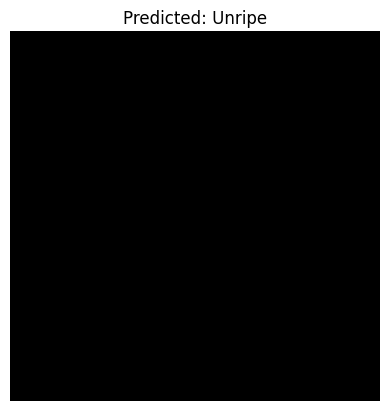

Target label: Unripe


In [ ]:
for index in range(len(X_val)):
    show_image_and_predict_from_array(model, index)
    print("==========================================")
    break